In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# sns.pairplot( 'input_data', 구별할 컬럼기준)

In [4]:
# sns.pairplot(iris, hue='species')

# plt.scatter() c='구별할 컬럼' 가장 대표적 산점도

# sns.scatterplit(x,y,hue='구별할컬럼')

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


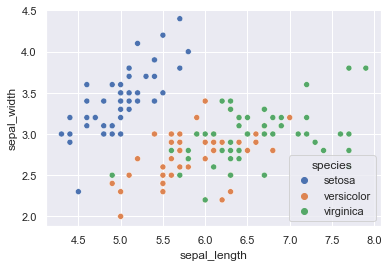

In [5]:
sns.set()
sns.scatterplot(iris['sepal_length'],iris['sepal_width'],hue=iris['species'])

# sns.displot() 분포를 표현

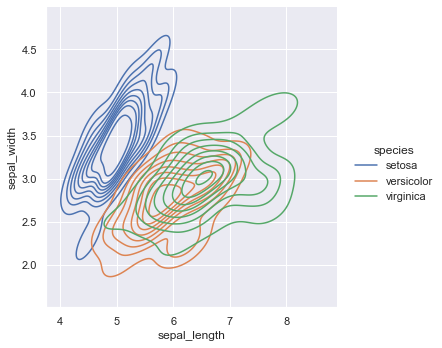

In [6]:
sns.displot(data=iris , x='sepal_length',y='sepal_width',kind='kde',hue='species')

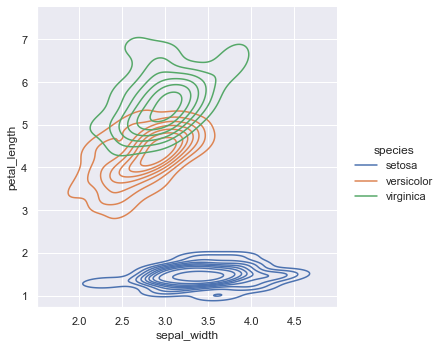

In [7]:
sns.displot(data=iris,x='sepal_width',y='petal_length',hue='species',kind='kde')

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


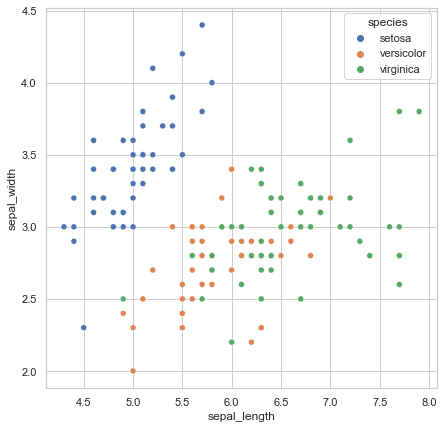

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
sns.scatterplot(iris.sepal_length , iris.sepal_width ,data=iris,hue='species')

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


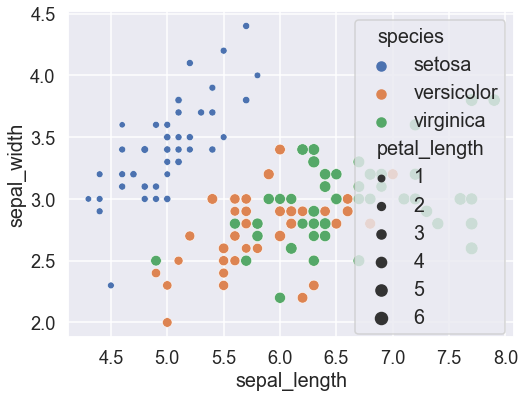

In [9]:
sns.set_style("darkgrid")
sns.set_context('talk',font_scale=1.1)
plt.figure(figsize=(8,6))
sns.scatterplot(iris.sepal_length , iris.sepal_width, size=iris.petal_length  , data=iris ,hue='species')


# relplot usage
# kind = 'line' must be added to plot line graph

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(40.896654333333345, 0.5, 'sepal width')

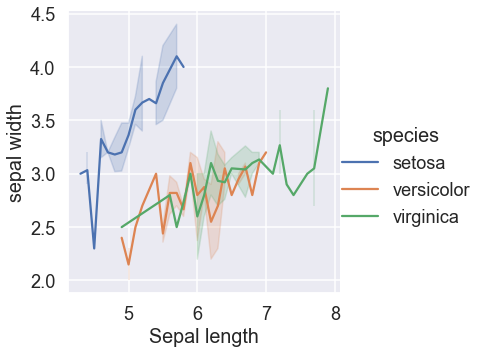

In [10]:
sns.relplot(iris.sepal_length , iris.sepal_width , data=iris , hue='species',kind='line')
plt.xlabel("Sepal length")
plt.ylabel("sepal width")

# distplot

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

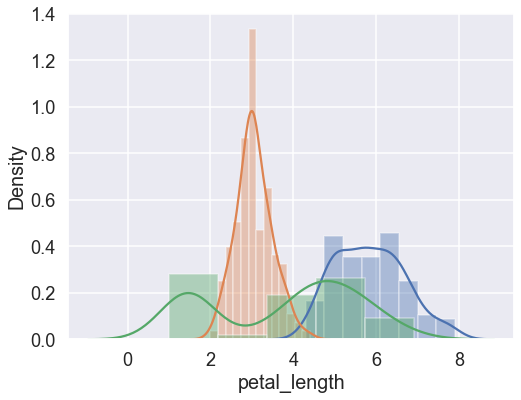

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(iris.sepal_length)
sns.distplot(iris.sepal_width)
sns.distplot(iris.petal_length)

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


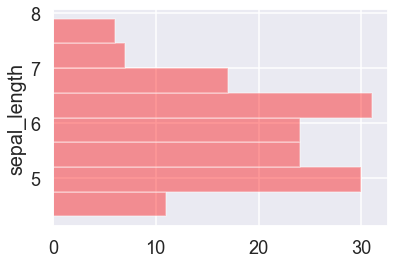

In [12]:
sns.distplot(iris.sepal_length , vertical=True , kde=False , color='red')

In [13]:
iris['species'][0]

'setosa'

In [14]:
setosa = iris[iris.species==iris['species'].unique()[0]]
versi = iris[iris.species==iris['species'].unique()[1]]
vir = iris[iris.species==iris['species'].unique()[2]]


In [15]:
from gibbs_sampling import GibbsSampling
seto_x = setosa.drop(['species'],axis=1)
versi_x =versi.drop(['species'],axis=1)
vir_x = vir.drop(['species'],axis=1)

In [16]:
g1 = GibbsSampling(100,seto_x,[5,5,10,5])
g2 =  GibbsSampling(100,versi_x,5)
g3 =  GibbsSampling(500,vir_x,5)


seto_sample = g1.data_sampling()
versi_sample = g2.data_sampling()
vir_sample = g3.data_sampling()

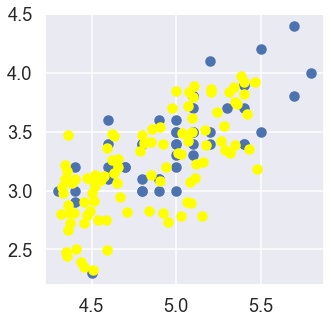

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(setosa.iloc[:,0:1],setosa.iloc[:,1:2])
plt.scatter(seto_sample[:,0:1],seto_sample[:,1:2],c='yellow')

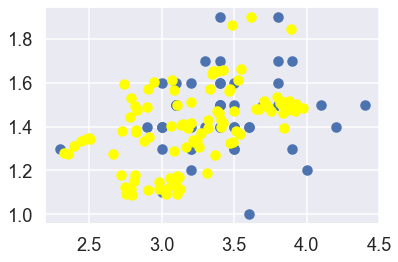

In [18]:
plt.scatter(setosa.iloc[:,1:2],setosa.iloc[:,2:3])
plt.scatter(seto_sample[:,1:2],seto_sample[:,2:3],c='yellow')


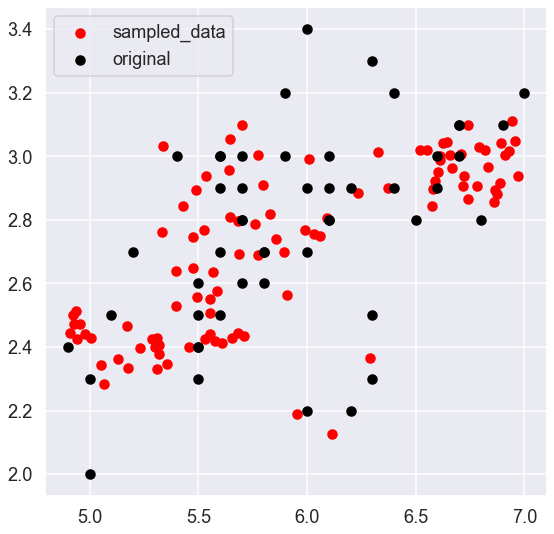

In [19]:
plt.figure(figsize=(9,9))

plt.scatter(versi_sample[:,0:1],versi_sample[:,1:2], c='red',label='sampled_data')
plt.scatter(versi_x.iloc[:,0:1],versi_x.iloc[:,1:2],c='black' , label='original')
plt.legend()


In [20]:
columns = iris.columns[:-1]

In [41]:
testx = pd.DataFrame(seto_sample , columns=columns)
versi_pd = pd.DataFrame(versi_sample,columns=columns)


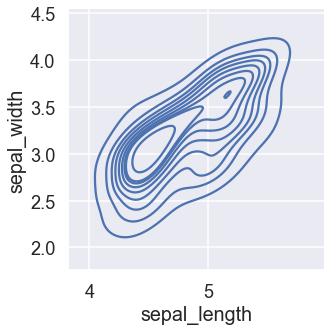

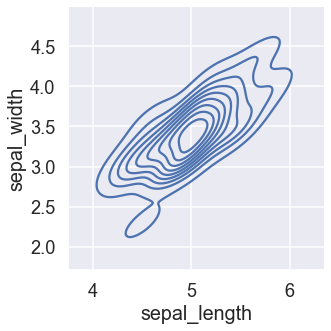

In [22]:
sns.displot(data=testx , x='sepal_length',y='sepal_width',kind='kde')
sns.displot(data=seto_x , x='sepal_length',y='sepal_width',kind='kde')

In [23]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0)

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [24]:
X.shape

(1000, 3)

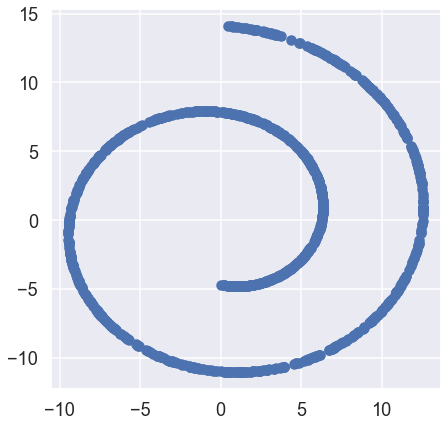

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(X[:,0:1],X[:,2:3])


In [26]:
g4 =  GibbsSampling(500,X,[20,30,20])


sample= g4.data_sampling()

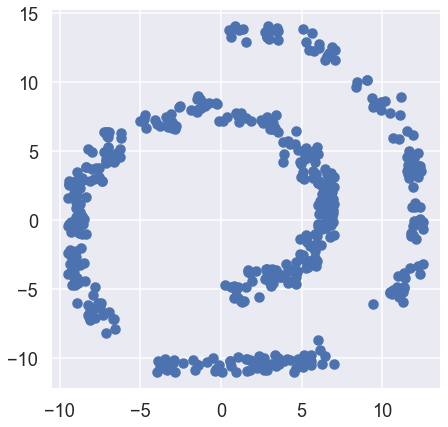

In [27]:
plt.figure(figsize=(7,7))
plt.scatter(sample[:,0:1],sample[:,2:3])



/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


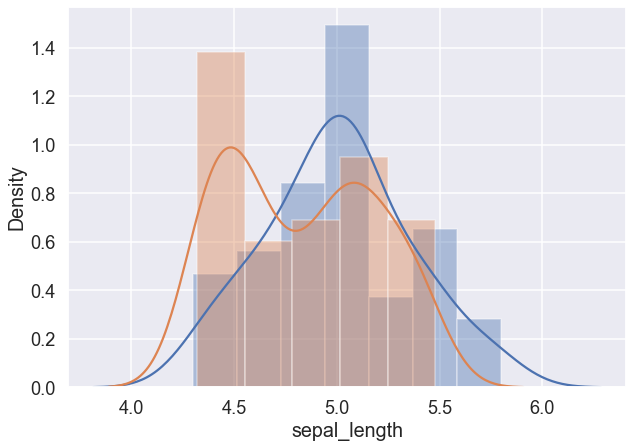

In [36]:
plt.figure(figsize=(10,7))
sns.distplot(setosa.sepal_length)
sns.distplot(testx.sepal_length)

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


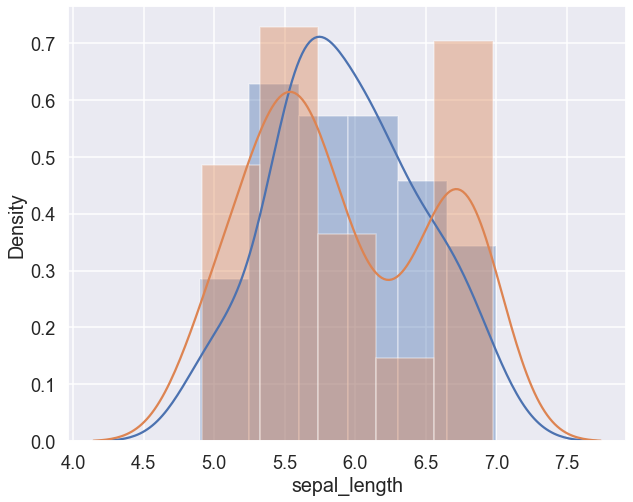

In [45]:
plt.figure(figsize=(10,8))
sns.distplot(versi.sepal_length)
sns.distplot(versi_pd.sepal_length)

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

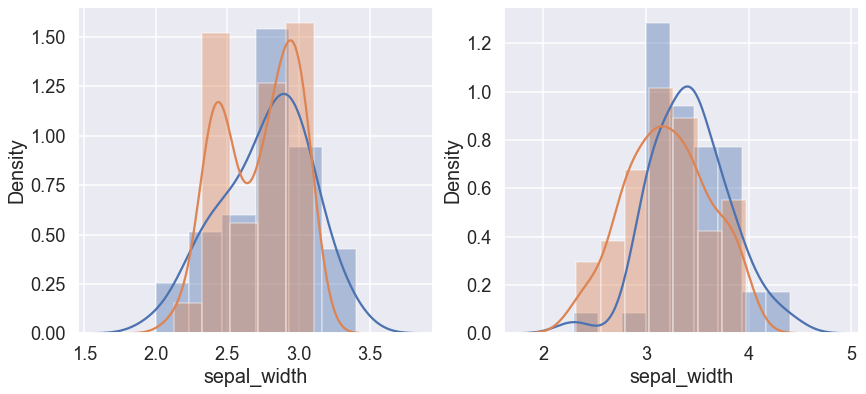

In [55]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
sns.distplot(versi.sepal_width ,ax=ax[0])
sns.distplot(versi_pd.sepal_width , ax=ax[0])


sns.distplot(setosa.sepal_width, ax=ax[1])
sns.distplot(testx.sepal_width , ax=ax[1])

